# Climate change

In the following sections, we use Python to demonstrate how to access multiples datasets from the Atmosphere sub-catalog.

## Environment setup

In [1]:
from distributed import Client
import intake
import hvplot.xarray
import hvplot.pandas
from dask.distributed import PipInstall
import dask
import xoak
import xarray as xr
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import xarray as xr
import numpy as np
import dask
from dask.diagnostics import progress
from tqdm.autonotebook import tqdm
import fsspec
import seaborn as sns

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

/tmp/ipykernel_258686/326864322.py:16: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from tqdm.autonotebook import tqdm


We use a [Dask](https://docs.dask.org/en/stable/) client to ensure all following code compatible with the framework run in parallel

In [2]:
client = Client()
client

2022-11-21 23:13:44,330 - distributed.diskutils - INFO - Found stale lock file and directory '/tmp/dask-worker-space/worker-j5d1xfop', purging


<Client: 'tcp://127.0.0.1:46561' processes=8 threads=32, memory=125.73 GiB>

## Accessing the data

We are now ready to access our catalog which uses Intake to organize all our datasets.

Intake is a lightweight package for finding, investigating, loading and disseminating data. A cataloging system is used to organize a collection of datasets and data loaders (drivers) are parameterized such that datasets are opened in the desired format for the end user. In the python context, multi-dimensional xarrays could be opened with xarray's drivers while polygons (shapefiles, geojson) could be opened with geopandas.

Here is the URL from where we can open the catalog: 

### a) CMIP6

In order to arrange the collection of datasets, the catalogue itself makes references to various sub-catalogs:

In [3]:
col = intake.open_esm_datastore('https://storage.googleapis.com/cmip6/pangeo-cmip6.json')
col

In [4]:
col.df['variable_id'].unique()

array(['ps', 'rsds', 'rlus', 'rlds', 'psl', 'hurs', 'huss', 'hus', 'hfss',
       'rsus', 'evspsbl', 'rsdt', 'hfls', 'rsut', 'clt', 'zg', 'ts', 'va',
       'uas', 'vas', 'tas', 'ta', 'ua', 'pr', 'tauv', 'prc', 'tauu',
       'rsutcs', 'wtem', 'vtem', 'prw', 'prsn', 'rlut', 'rlutcs',
       'tasmax', 'tasmin', 'emidust', 'emiss', 'mmrbc', 'mmrdust',
       'mmroa', 'mmrpm2p5', 'o3', 'mmrsoa', 'mmrss', 'od550lt1aer', 'oh',
       'emidms', 'mmrso4', 'cltc', 'ptp', 'airmass', 'ccb', 'cdnc', 'toz',
       'so2', 'rsutcsaf', 'wa', 'rlutcsaf', 'rlutaf', 'od870aer',
       'od550aer', 'abs550aer', 'rsutaf', 'snw', 'mrsos', 'mrso', 'mrro',
       'areacella', 'siconc', 'basin', 'mrros', 'mlotst', 'clivi', 'hur',
       'sfdsi', 'co2mass', 'rsntds', 'masso', 'soga', 'evspsblsoi', 'sos',
       'sosga', 'tauuo', 'sfcWind', 'clwvi', 'vo', 'vmo', 'uo', 'umo',
       'tosga', 'tauvo', 'tos', 'thetao', 'thetaoga', 'pbo', 'thkcello',
       'orog', 'volo', 'wfo', 'cllcalipso', 'evspsblpot', 'wap', '

In [5]:
col.df

activity_id       institution_id      source_id       experiment_id  \
0       HighResMIP                 CMCC   CMCC-CM2-HR4  highresSST-present   
1       HighResMIP                 CMCC   CMCC-CM2-HR4  highresSST-present   
2       HighResMIP                 CMCC   CMCC-CM2-HR4  highresSST-present   
3       HighResMIP                 CMCC   CMCC-CM2-HR4  highresSST-present   
4       HighResMIP                 CMCC   CMCC-CM2-HR4  highresSST-present   
...            ...                  ...            ...                 ...   
514813        CMIP  EC-Earth-Consortium  EC-Earth3-Veg          historical   
514814        CMIP  EC-Earth-Consortium  EC-Earth3-Veg          historical   
514815        CMIP  EC-Earth-Consortium  EC-Earth3-Veg          historical   
514816        CMIP  EC-Earth-Consortium  EC-Earth3-Veg          historical   
514817        CMIP  EC-Earth-Consortium  EC-Earth3-Veg          historical   

       member_id table_id variable_id grid_label  \
0       r1i1p1f1     Amon          ps         gn   
1       r1i1p1f1     Amon        rsds         gn   
2       r1i1p1f1     Amon        rlus         gn   
3       r1i1p1f1     Amon        rlds         gn   
4       r1i1p1f1     Amon         psl         gn   
...          ...      ...         ...        ...   
514813  r1i1p1f1     Amon         tas         gr   
514814  r1i1p1f1     Amon        tauu         gr   
514815  r1i1p1f1     Amon         hur         gr   
514816  r1i1p1f1     Amon         hus         gr   
514817  r1i1p1f1     Amon        tauv         gr   

                                                   zstore  dcpp_init_year  \
0       gs://cmip6/CMIP6/HighResMIP/CMCC/CMCC-CM2-HR4/...             NaN   
1       gs://cmip6/CMIP6/HighResMIP/CMCC/CMCC-CM2-HR4/...             NaN   
2       gs://cmip6/CMIP6/HighResMIP/CMCC/CMCC-CM2-HR4/...             NaN   
3       gs://cmip6/CMIP6/HighResMIP/CMCC/CMCC-CM2-HR4/...             NaN   
4       gs://cmip6/CMIP6/HighResMIP/CMCC/CMCC-CM2-HR4/...             NaN   
...                                                   ...             ...   
514813  gs://cmip6/CMIP6/CMIP/EC-Earth-Consortium/EC-E...             NaN   
514814  gs://cmip6/CMIP6/CMIP/EC-Earth-Consortium/EC-E...             NaN   
514815  gs://cmip6/CMIP6/CMIP/EC-Earth-Consortium/EC-E...             NaN   
514816  gs://cmip6/CMIP6/CMIP/EC-Earth-Consortium/EC-E...             NaN   
514817  gs://cmip6/CMIP6/CMIP/EC-Earth-Consortium/EC-E...             NaN   

         version  
0       20170706  
1       20170706  
2       20170706  
3       20170706  
4       20170706  
...          ...  
514813  20211207  
514814  20211207  
514815  20211207  
514816  20211207  
514817  20211207  

[514818 rows x 11 columns]

The following examples will focus on datasets from the Atmosphere sub-catalog.

Even though our catalogue is constantly expanding, some datasets are already available. The next sections contain several examples of queries as well as analyses of various ones.

The current *Atmosphere* catalog is presented below in a table format. A dataset should be used after consulting the status field. If a dataset has a "dev" flag, it signifies that we are actively working on it and do not recommend using it. It is production-ready if it has a "prod" flag. The "prod" label signifies that the dataset has undergone quality review and testing, however users should always double-check on their own because errors are still possible.

In [6]:
# load a few models to illustrate the problem
query = dict(experiment_id=["ssp585"],
             variable_id="tasmax",
             grid_label="gn",
             table_id='Amon',
             member_id='r1i1p1f1'
            )
cat = col.search(**query)

xarray_kwargs = {'consolidated': True, 'decode_times':False}

with dask.config.set(**{'array.slicing.split_large_chunks': True}):
    dset_dict = cat.to_dataset_dict(xarray_open_kwargs=xarray_kwargs)


--> The keys in the returned dictionary of datasets are constructed as follows:
	'activity_id.institution_id.source_id.experiment_id.table_id.grid_label'


In [7]:
[key for key in dset_dict.keys()]


['ScenarioMIP.CAS.FGOALS-g3.ssp585.Amon.gn',
 'ScenarioMIP.FIO-QLNM.FIO-ESM-2-0.ssp585.Amon.gn',
 'ScenarioMIP.NUIST.NESM3.ssp585.Amon.gn',
 'ScenarioMIP.MPI-M.MPI-ESM1-2-LR.ssp585.Amon.gn',
 'ScenarioMIP.AWI.AWI-CM-1-1-MR.ssp585.Amon.gn',
 'ScenarioMIP.MIROC.MIROC6.ssp585.Amon.gn',
 'ScenarioMIP.MRI.MRI-ESM2-0.ssp585.Amon.gn',
 'ScenarioMIP.NCAR.CESM2-WACCM.ssp585.Amon.gn',
 'ScenarioMIP.CSIRO-ARCCSS.ACCESS-CM2.ssp585.Amon.gn',
 'ScenarioMIP.CCCma.CanESM5.ssp585.Amon.gn',
 'ScenarioMIP.DKRZ.MPI-ESM1-2-HR.ssp585.Amon.gn',
 'ScenarioMIP.BCC.BCC-CSM2-MR.ssp585.Amon.gn']

In [8]:
ds = dset_dict[list(dset_dict.keys())[0]]
ds

<xarray.Dataset>
Dimensions:         (lat: 80, bnds: 2, lon: 180, member_id: 1,
                     dcpp_init_year: 1, time: 1032)
Coordinates:
    height          float64 ...
  * lat             (lat) float64 -90.0 -84.82 -80.72 ... 80.72 84.82 90.0
    lat_bnds        (lat, bnds) float64 dask.array<chunksize=(80, 2), meta=np.ndarray>
  * lon             (lon) float64 0.0 2.0 4.0 6.0 ... 352.0 354.0 356.0 358.0
    lon_bnds        (lon, bnds) float64 dask.array<chunksize=(180, 2), meta=np.ndarray>
  * time            (time) int64 0 708 1416 2148 ... 750420 751152 751884 752616
    time_bnds       (time, bnds) float64 dask.array<chunksize=(1032, 2), meta=np.ndarray>
  * member_id       (member_id) object 'r1i1p1f1'
  * dcpp_init_year  (dcpp_init_year) float64 nan
Dimensions without coordinates: bnds
Data variables:
    tasmax          (member_id, dcpp_init_year, time, lat, lon) float32 dask.array<chunksize=(1, 1, 1032, 80, 180), meta=np.ndarray>
Attributes: (12/62)
    Conventions:                      CF-1.7 CMIP-6.2
    activity_id:                      ScenarioMIP
    branch_method:                    standard
    branch_time_in_child:             0.0
    branch_time_in_parent:            60225.0
    cmor_version:                     3.5.0
    ...                               ...
    intake_esm_attrs:variable_id:     tasmax
    intake_esm_attrs:grid_label:      gn
    intake_esm_attrs:zstore:          gs://cmip6/CMIP6/ScenarioMIP/CAS/FGOALS...
    intake_esm_attrs:version:         20190818
    intake_esm_attrs:_data_format_:   zarr
    intake_esm_dataset_key:           ScenarioMIP.CAS.FGOALS-g3.ssp585.Amon.gn

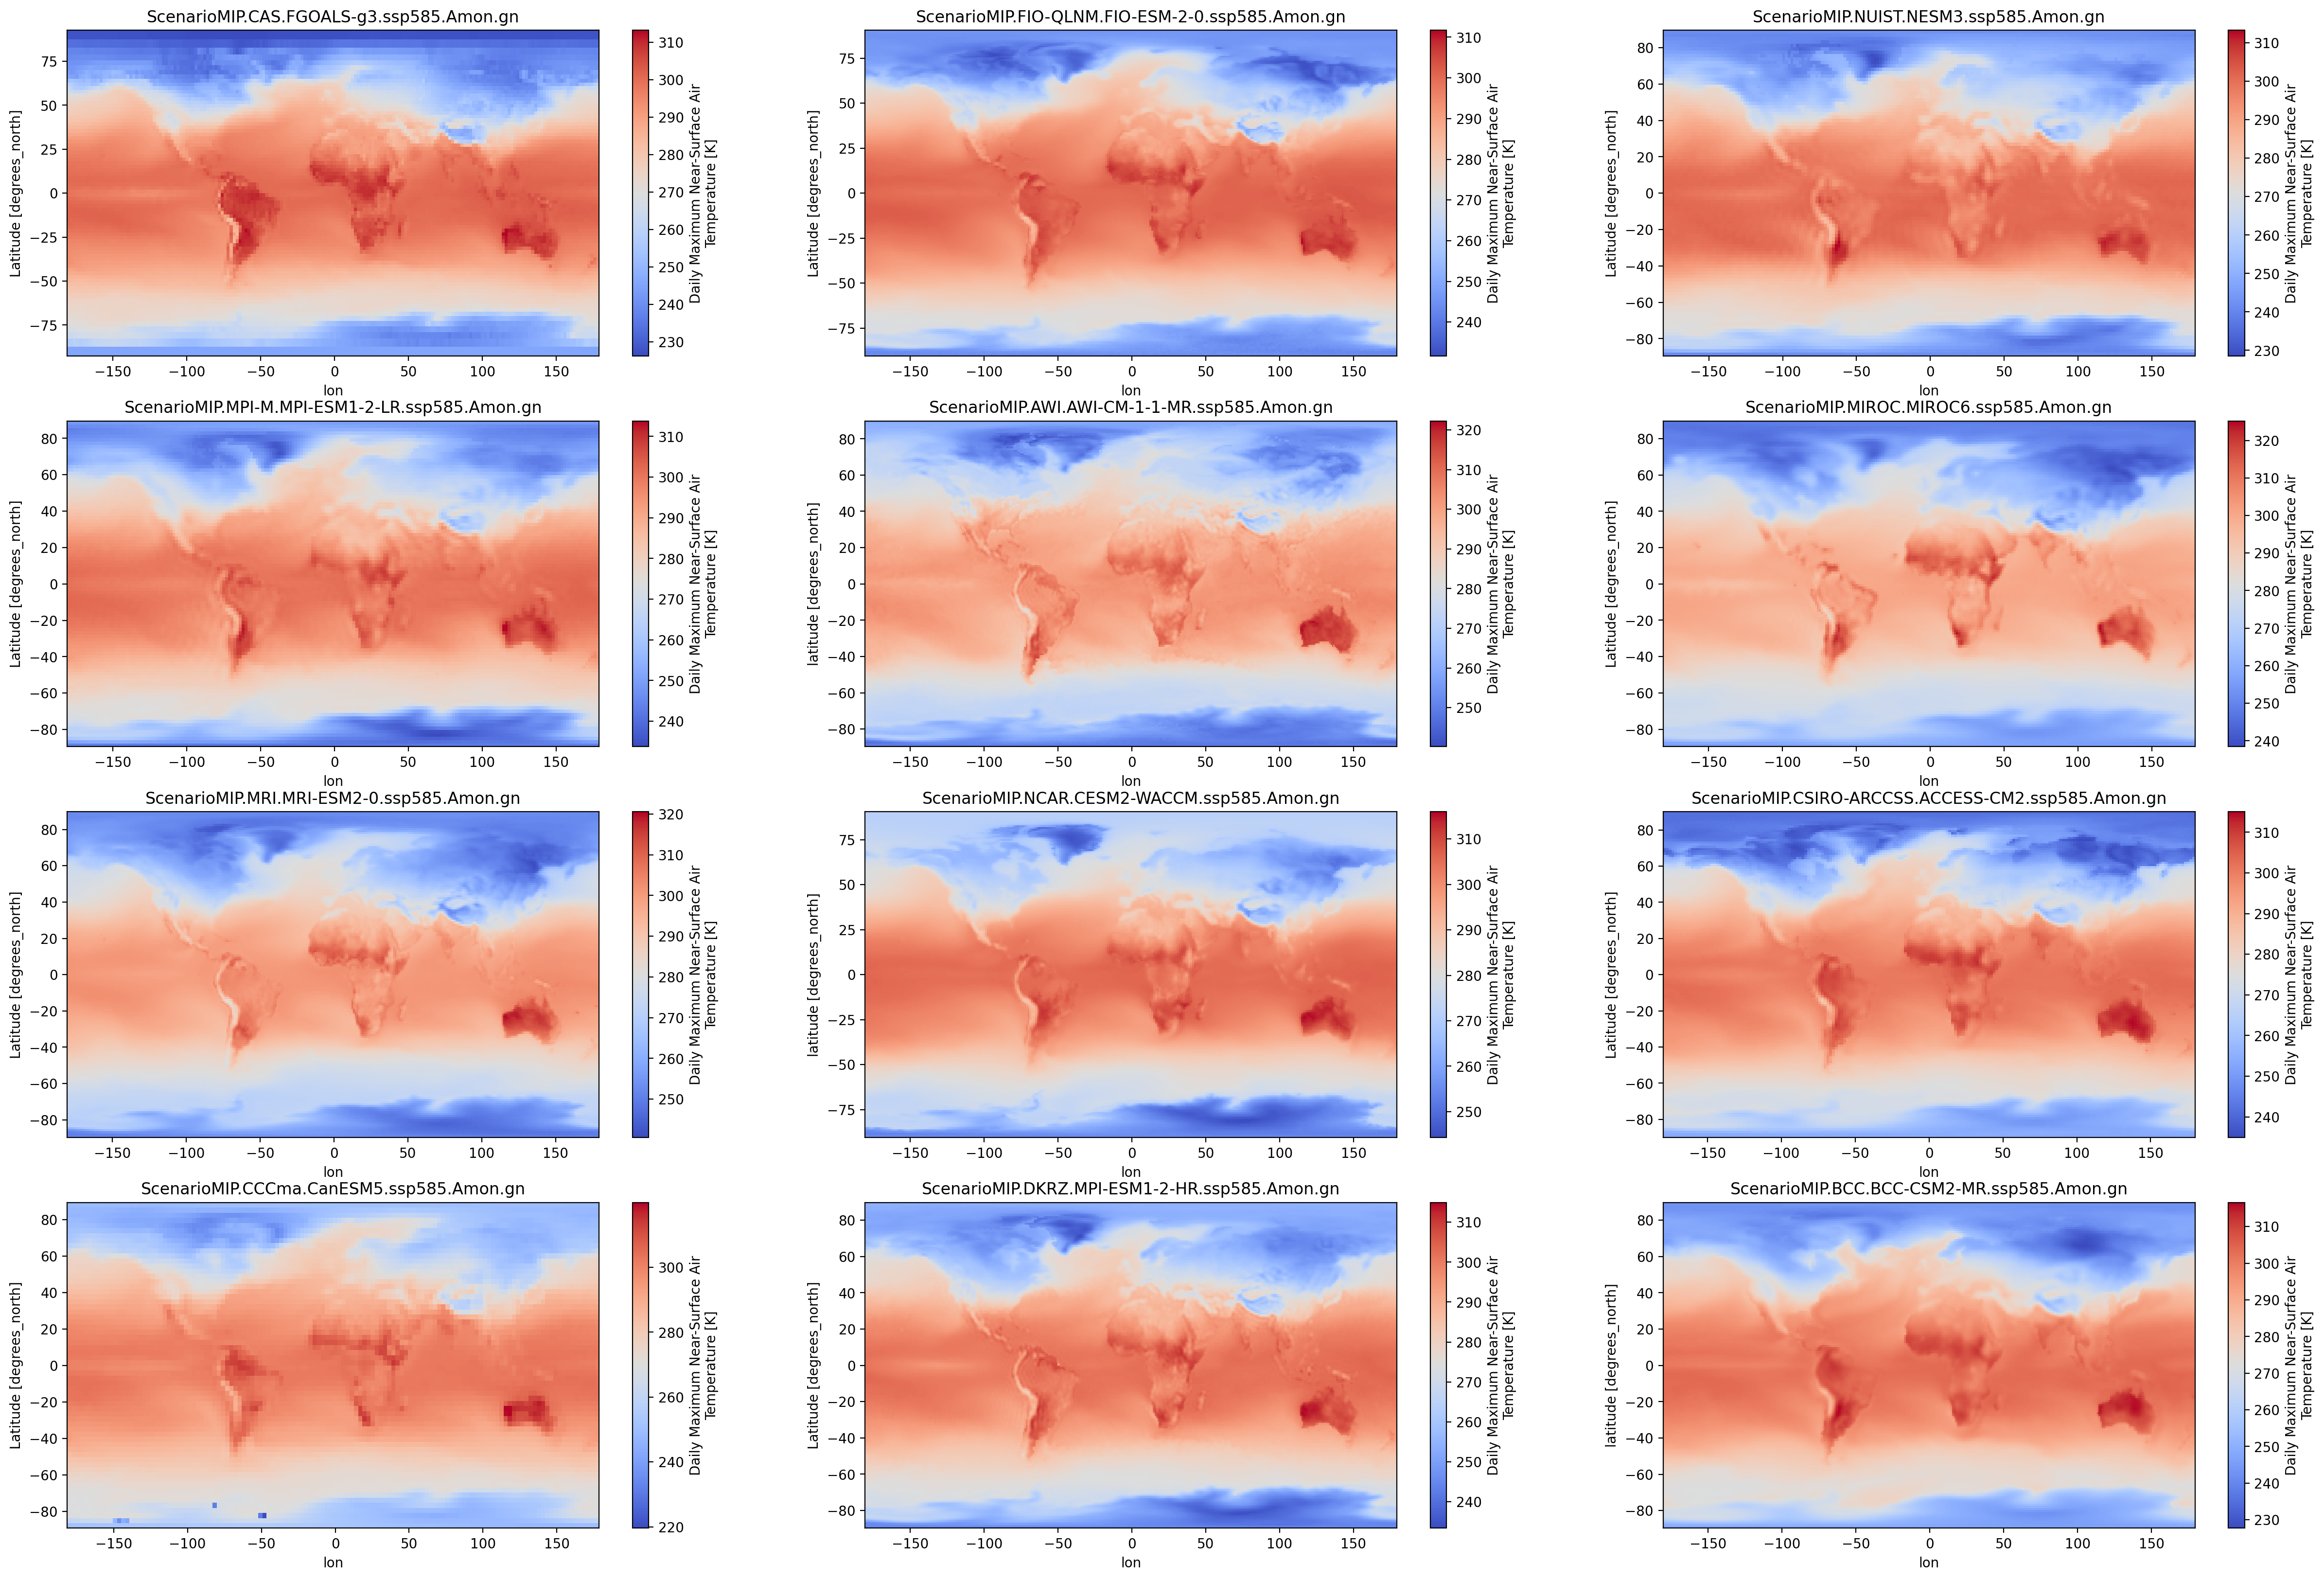

In [9]:
fig, axarr = plt.subplots(nrows=4, ncols=3, figsize=[30,20])
for ax,(k, ds) in zip(axarr.flat,dset_dict.items()):
    if 'member_id' in ds.dims:
        ds = ds.isel(member_id=0)
    ds.coords['lon'] = (ds.coords['lon'] + 180) % 360 - 180
    ds = ds.sortby(ds.lon)
    da = ds.tasmax.isel(time=0).squeeze().plot.pcolormesh(ax=ax, cmap='coolwarm')
    ax.set_title(k)

In [ ]:
fig, axarr = plt.subplots(nrows=4, ncols=3, figsize=[30,20])
for ax,(k, ds) in zip(axarr.flat,dset_dict.items()):
    if 'member_id' in ds.dims:
        ds = ds.isel(member_id=0)
    da = ds.tasmax.sel(lon=280, lat=45, method='nearest').squeeze().plot(ax=ax, color='blue')
    ax.set_title(k)

ERA5 is the fifth generation ECMWF atmospheric reanalysis of the global climate covering the period from January 1950 to present. ERA5 is produced by the Copernicus Climate Change Service (C3S) at ECMWF.

Reanalysis combines model data with observations from across the world into a globally complete and consistent dataset using the laws of physics. This principle, called data assimilation, is based on the method used by numerical weather prediction centres, where every so many hours (12 hours at ECMWF) a previous forecast is combined with newly available observations in an optimal way to produce a new best estimate of the state of the atmosphere, called analysis, from which an updated, improved forecast is issued. Reanalysis works in the same way, but at reduced resolution to allow for the provision of a dataset spanning back several decades. Reanalysis does not have the constraint of issuing timely forecasts, so there is more time to collect observations, and when going further back in time, to allow for the ingestion of improved versions of the original observations, which all benefit the quality of the reanalysis product.

| Property         | Values                                           |
|------------------|--------------------------------------------------|
| Temporal extent: | 01/01/1979 – 12/31/2020                          |
| Spatial extent:  | World : [-180, 180, -90, 90]                             |
| Chunks (timeseries's version):           | {'time': 14880, 'longitude': 15, 'latitude': 15} |
| Chunks (spatial's version):           | {'time': 24, 'longitude': 1440, 'latitude': 721} |
| Spatial resolution:          | 0.25 degrees |
| Spatial reference:          | WGS84 (EPSG:4326) |
| Temporal resolution:           | 1 hour |
| Update frequency:          | In 2023, we will update it weekly |

In [ ]:
[eid for eid in col.df['experiment_id'].unique() if 'ssp' in eid]


In [ ]:
# there is currently a significant amount of data for these runs
expts = ['historical', 'ssp245', 'ssp585']

query = dict(
    experiment_id=expts,
    table_id='Amon',
    variable_id=['tas'],
    member_id = 'r1i1p1f1',
)

col_subset = col.search(require_all_on=["source_id"], **query)
col_subset.df.groupby("source_id")[
    ["experiment_id", "variable_id", "table_id"]
].nunique()

In [ ]:
def drop_all_bounds(ds):
    drop_vars = [vname for vname in ds.coords
                 if (('_bounds') in vname ) or ('_bnds') in vname]
    return ds.drop(drop_vars)

def open_dset(df):
    assert len(df) == 1
    ds = xr.open_zarr(fsspec.get_mapper(df.zstore.values[0]), consolidated=True)
    return drop_all_bounds(ds)

def open_delayed(df):
    return dask.delayed(open_dset)(df)

from collections import defaultdict
dsets = defaultdict(dict)

for group, df in col_subset.df.groupby(by=['source_id', 'experiment_id']):
    dsets[group[0]][group[1]] = open_delayed(df)

In [ ]:
dsets_ = dask.compute(dict(dsets))[0]


In [ ]:
# calculate global means

def get_lat_name(ds):
    for lat_name in ['lat', 'latitude']:
        if lat_name in ds.coords:
            return lat_name
    raise RuntimeError("Couldn't find a latitude coordinate")

def global_mean(ds):
    lat = ds[get_lat_name(ds)]
    weight = np.cos(np.deg2rad(lat))
    weight /= weight.mean()
    other_dims = set(ds.dims) - {'time'}
    return (ds * weight).mean(other_dims)

In [ ]:
expt_da = xr.DataArray(expts, dims='experiment_id', name='experiment_id',
                       coords={'experiment_id': expts})

dsets_aligned = {}

for k, v in tqdm(dsets_.items()):
    expt_dsets = v.values()
    if any([d is None for d in expt_dsets]):
        print(f"Missing experiment for {k}")
        continue

    for ds in expt_dsets:
        ds.coords['year'] = ds.time.dt.year

    # workaround for
    # https://github.com/pydata/xarray/issues/2237#issuecomment-620961663
    dsets_ann_mean = [v[expt].pipe(global_mean)
                             .swap_dims({'time': 'year'})
                             .drop('time')
                             .coarsen(year=12).mean()
                      for expt in expts]

    # align everything with the 4xCO2 experiment
    dsets_aligned[k] = xr.concat(dsets_ann_mean, join='outer',
                                 dim=expt_da)

In [ ]:
with progress.ProgressBar():
    dsets_aligned_ = dask.compute(dsets_aligned)[0]

We can quickly choose data subsets in both space and time using *xarray*. Here, we choose July 19–20, 1996, a period when Quebec saw historically extreme precipitation (Canada). The graphic package *hvplot* can then be used to track the storm throughout the event.

In [ ]:
source_ids = list(dsets_aligned_.keys())
source_da = xr.DataArray(source_ids, dims='source_id', name='source_id',
                         coords={'source_id': source_ids})

big_ds = xr.concat([ds.reset_coords(drop=True)
                    for ds in dsets_aligned_.values()],
                    dim=source_da)

big_ds

In [ ]:
df_all = big_ds.sel(year=slice(1900, 2100)).to_dataframe().reset_index()
df_all.head()

In [ ]:
sns.relplot(data=df_all,
            x="year", y="tas", hue='experiment_id',
            kind="line", errorbar='sd', aspect=2);

### b) Cordex-NA

In [ ]:
col = intake.open_esm_datastore('https://ncar-na-cordex.s3-us-west-2.amazonaws.com/catalogs/aws-na-cordex.json')
col

In [ ]:
# Show the first few lines of the catalog
col.df

In [ ]:
data_var = 'tmax'

col_subset = col.search(
    variable=data_var,
    grid="NAM-44i",
    bias_correction="raw",
    scenario='rcp45'
)

col_subset

In [ ]:
col_subset.df


In [ ]:
# Load catalog entries for subset into a dictionary of xarray datasets, and open the first one.
dsets = col_subset.to_dataset_dict(
    xarray_open_kwargs={"consolidated": True}, storage_options={"anon": True}
)
print(f"\nDataset dictionary keys:\n {dsets.keys()}")

# Load the first dataset and display a summary.
dataset_key = list(dsets.keys())[0]
store_name = dataset_key + ".zarr"

ds = dsets[dataset_key]
ds

# Note that the summary includes a 'member_id' coordinate, which is a renaming of the 
# 'na-cordex-models' column in the catalog.

In [ ]:
ds.tmax \
.sel(lat=45, lon=-75, method='nearest') \
.hvplot(x='time',by='member_id', width=750, height=500, grid=True) \
.opts(legend_position='bottom')